使用四分位距和截距法进行异常值处理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
linelevel_pre_false = pd.read_json('linelevel_pre_false.json')
linelevel_pre_true = pd.read_json('linelevel_pre_true.json')

linelevel_attribution_false = pd.read_json('linelevel_attribution_false.json')
linelevel_attribution_true = pd.read_json('linelevel_attribution_true.json')
linelevel_attribution_false['value'] = linelevel_attribution_false['value'] * 10
linelevel_attribution_true['value'] = linelevel_attribution_true['value'] * 10

In [3]:
len(linelevel_pre_false),len(linelevel_attribution_false)

(965, 6079)

In [4]:
len(linelevel_pre_true),len(linelevel_attribution_true)

(2174, 14274)

true

In [5]:
line_type = ['MethodDeclaration_num','variableDeclaration_num','expression_num','ifstatement_num',
             'forstatement_num','whilestatement_num','trystatement_num', 'returnstatement_num']

In [6]:
def get_list_print_df(df, name):
    col_list = []
    for i in range(len(df)):
        if df.loc[i]['key'] == name:
            attr = df.loc[i]['value']
            col_list.append(attr)
    df = pd.DataFrame(col_list, columns=[name])
    return df

In [7]:
def get_all_colunm_df(df,column_order):
    unique_values = df['key'].value_counts().index
    result = pd.DataFrame()

    for uniq in unique_values:
        attr = get_list_print_df(df, uniq)
        result = pd.concat([result, attr], axis=1)
        
    # 重新排序列名
    result = result[column_order]
    
    # 删除列名称中的 '_num' 字符串
    result.rename(columns=lambda x: x.replace('_num', ''), inplace=True)
    return result 

In [8]:
all_colunm_df_true = get_all_colunm_df(linelevel_attribution_true,line_type)
all_colunm_df_true.head()

MethodDeclaration  variableDeclaration  expression  ifstatement  \
0           0.013571             0.191197    0.191197     0.224068   
1           0.412345             0.048397    0.048397     0.267434   
2           0.211686             0.266712    0.034493     0.034493   
3           0.023537             0.166484   -0.050494     0.136808   
4          -0.060836            -0.050494    0.023919    -0.031834   

   forstatement  whilestatement  trystatement  returnstatement  
0      0.131420       -0.135945     -0.087215        -0.026822  
1      0.222676        0.487758      0.005061         0.131420  
2           NaN        0.199363      0.145905         0.166484  
3           NaN       -0.011297     -0.041888         0.035449  
4           NaN        0.038573     -0.003133         0.232338

In [9]:
mean_value = all_colunm_df_true.mean()
mean_value 

MethodDeclaration     -0.010310
variableDeclaration    0.025459
expression             0.014970
ifstatement            0.008851
forstatement          -0.010513
whilestatement         0.012638
trystatement          -0.011785
returnstatement        0.021527
dtype: float64

In [10]:
std_value = all_colunm_df_true.std()
std_value

MethodDeclaration      0.558137
variableDeclaration    0.243739
expression             0.191643
ifstatement            0.179088
forstatement           0.199029
whilestatement         0.160666
trystatement           0.220961
returnstatement        0.393347
dtype: float64

In [11]:
# 画出和论文一样的图
def get_paper_picture(df, save_path=None):
    
    # 图形大小，随时改
    plt.figure(figsize=(40, 8))

    # 定义颜色
    palette = sns.color_palette('pastel')

    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print("均值 : ")
    print(mean_value)
    mean_value_sorted = mean_value.sort_values(ascending=False)
    print("\n从大到小排序后的均值 : ")
    print(mean_value_sorted)
    
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)


    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"图像已保存为: {save_path}")
        
    plt.show()


均值 : 
MethodDeclaration     -0.010310
variableDeclaration    0.025459
expression             0.014970
ifstatement            0.008851
forstatement          -0.010513
whilestatement         0.012638
trystatement          -0.011785
returnstatement        0.021527
dtype: float64

从大到小排序后的均值 : 
variableDeclaration    0.025459
returnstatement        0.021527
expression             0.014970
whilestatement         0.012638
ifstatement            0.008851
MethodDeclaration     -0.010310
forstatement          -0.010513
trystatement          -0.011785
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/原始图片_true_before_Abs_line.png


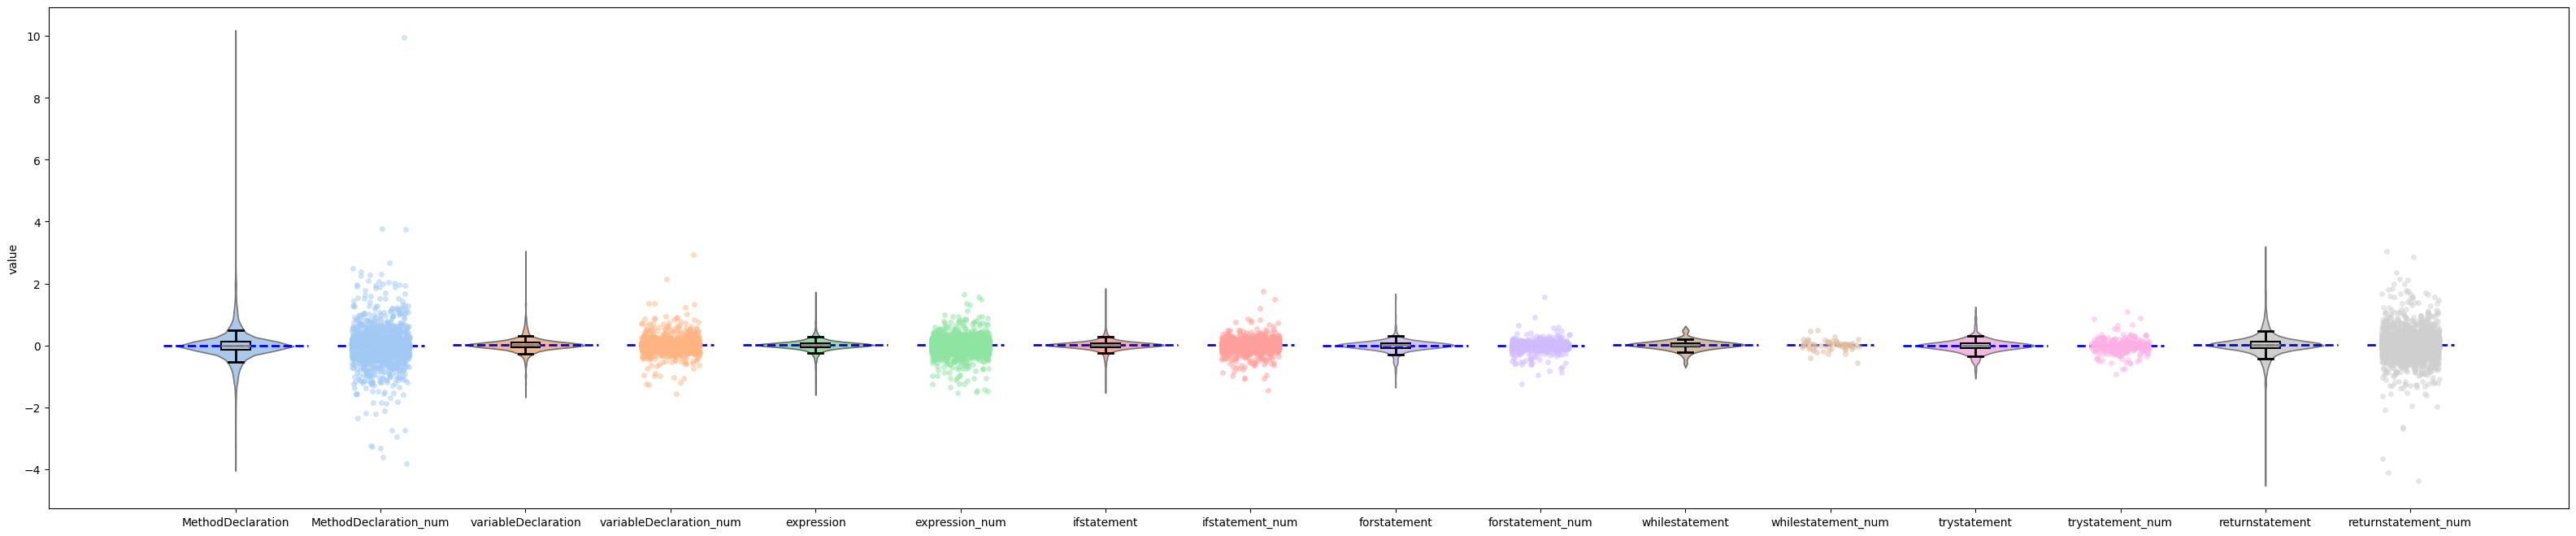

In [12]:
get_paper_picture(all_colunm_df_true,save_path='D:/BERT_learing/CCDP/picture/原始图片_true_before_Abs_line.png')

In [13]:
all_colunm_df_true_abs = all_colunm_df_true.abs()
all_colunm_df_true_abs.head()

MethodDeclaration  variableDeclaration  expression  ifstatement  \
0           0.013571             0.191197    0.191197     0.224068   
1           0.412345             0.048397    0.048397     0.267434   
2           0.211686             0.266712    0.034493     0.034493   
3           0.023537             0.166484    0.050494     0.136808   
4           0.060836             0.050494    0.023919     0.031834   

   forstatement  whilestatement  trystatement  returnstatement  
0      0.131420        0.135945      0.087215         0.026822  
1      0.222676        0.487758      0.005061         0.131420  
2           NaN        0.199363      0.145905         0.166484  
3           NaN        0.011297      0.041888         0.035449  
4           NaN        0.038573      0.003133         0.232338

均值 : 
MethodDeclaration      0.298500
variableDeclaration    0.140652
expression             0.114826
ifstatement            0.107835
forstatement           0.121815
whilestatement         0.108463
trystatement           0.145207
returnstatement        0.226889
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration      0.298500
returnstatement        0.226889
trystatement           0.145207
variableDeclaration    0.140652
forstatement           0.121815
expression             0.114826
whilestatement         0.108463
ifstatement            0.107835
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/原始图片_true_Abs_line.png


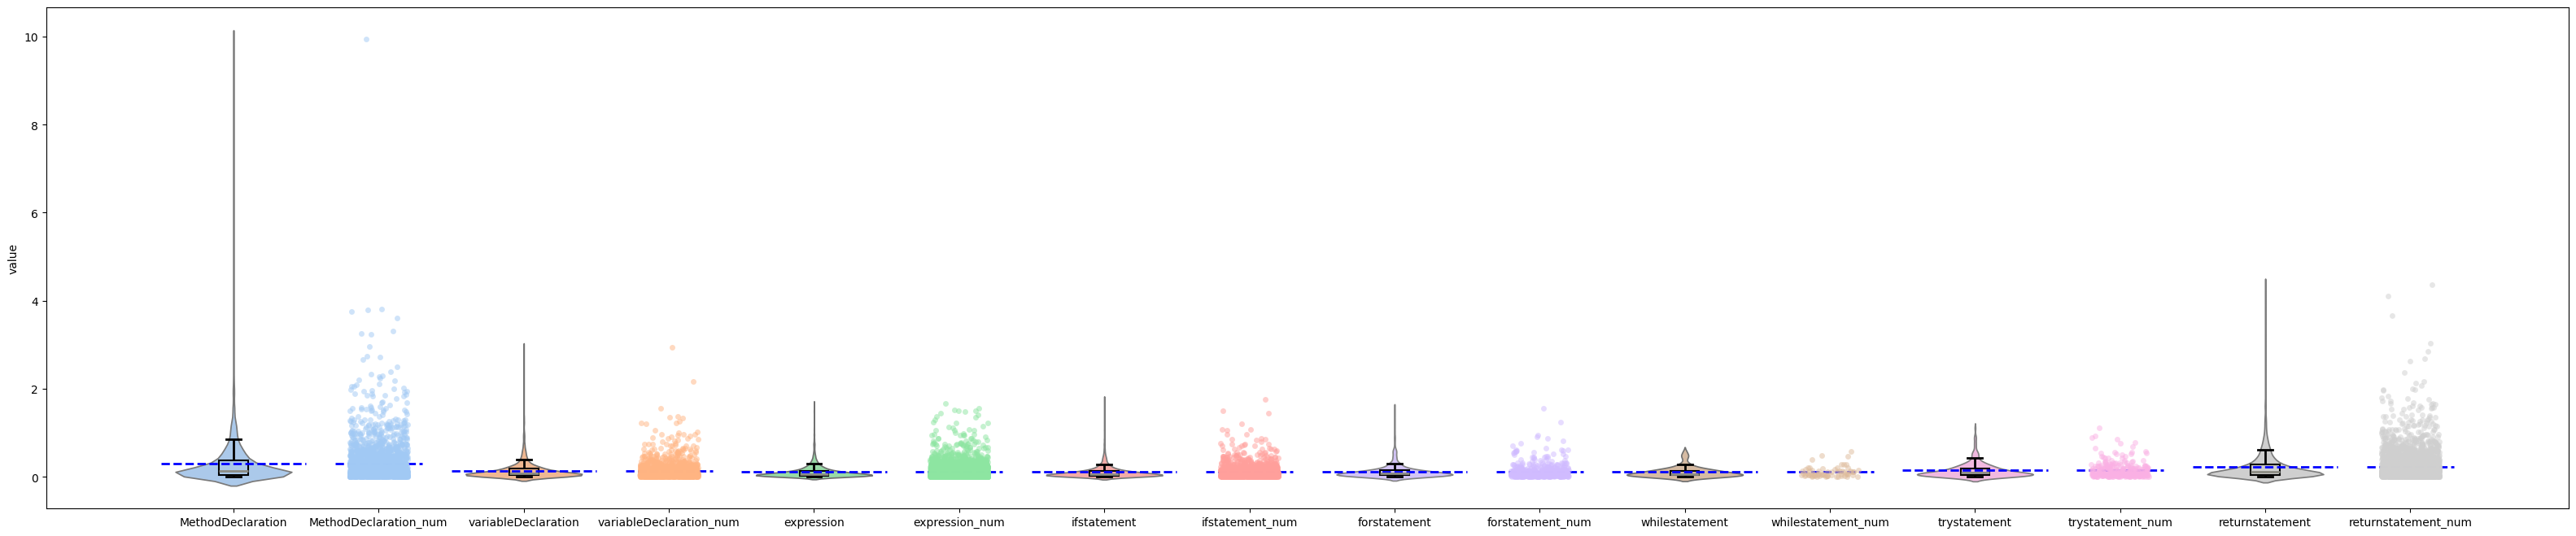

In [14]:
get_paper_picture(all_colunm_df_true_abs,save_path='D:/BERT_learing/CCDP/picture/原始图片_true_Abs_line.png')

In [15]:
# 截尾处理


def Winsorization_outliers(df):
    total_nan_count_new = 0  # 初始化总共删除的数量

    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = np.percentile(df[column_name].dropna(), 1)
        q3 = np.percentile(df[column_name].dropna(), 99)
        
        # 计算替换前的NaN数量
        nan_count_before = df[column_name].isna().sum()

        df[column_name] = df[column_name].apply(lambda x: np.nan if x < q1 or x > q3 else x)
        
        # 计算替换后的NaN数量
        nan_count_after = df[column_name].isna().sum()
        
        nan_count_new = nan_count_after - nan_count_before
               
        total_nan_count_new += nan_count_new    # 总共删除的数量
        
        print(f'列 {column_name} 的第1个分位数: {q1} \t第99个分位数: {q3}\t此列删除数量{nan_count_new}')
    print(f'所有列的总共删除的数量: {total_nan_count_new}')
    return df

all_colunm_df_true_for_Winsorization = all_colunm_df_true.copy()
all_colunm_df_true_Winsorization = Winsorization_outliers(all_colunm_df_true_for_Winsorization)

列 MethodDeclaration 的第1个分位数: -1.5406791286400001 	第99个分位数: 1.8000435060399986	此列删除数量44
列 variableDeclaration 的第1个分位数: -0.6254275038 	第99个分位数: 0.8041537126000027	此列删除数量30
列 expression 的第1个分位数: -0.5860716002199999 	第99个分位数: 0.5487505199599985	此列删除数量82
列 ifstatement 的第1个分位数: -0.58640354059 	第99个分位数: 0.4727679175199993	此列删除数量38
列 forstatement 的第1个分位数: -0.647687309 	第99个分位数: 0.4605896086600004	此列删除数量12
列 whilestatement 的第1个分位数: -0.45112757323 	第99个分位数: 0.47850189625	此列删除数量2
列 trystatement 的第1个分位数: -0.5746408190800001 	第99个分位数: 0.6837417618399999	此列删除数量8
列 returnstatement 的第1个分位数: -1.15898541216 	第99个分位数: 1.2796566937200045	此列删除数量62
所有列的总共删除的数量: 278


均值 : 
MethodDeclaration     -0.013368
variableDeclaration    0.023326
expression             0.016281
ifstatement            0.009668
forstatement          -0.009689
whilestatement         0.014260
trystatement          -0.013809
returnstatement        0.021905
dtype: float64

从大到小排序后的均值 : 
variableDeclaration    0.023326
returnstatement        0.021905
expression             0.016281
whilestatement         0.014260
ifstatement            0.009668
forstatement          -0.009689
MethodDeclaration     -0.013368
trystatement          -0.013809
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/Winsorization_true_before_Abs_line.png


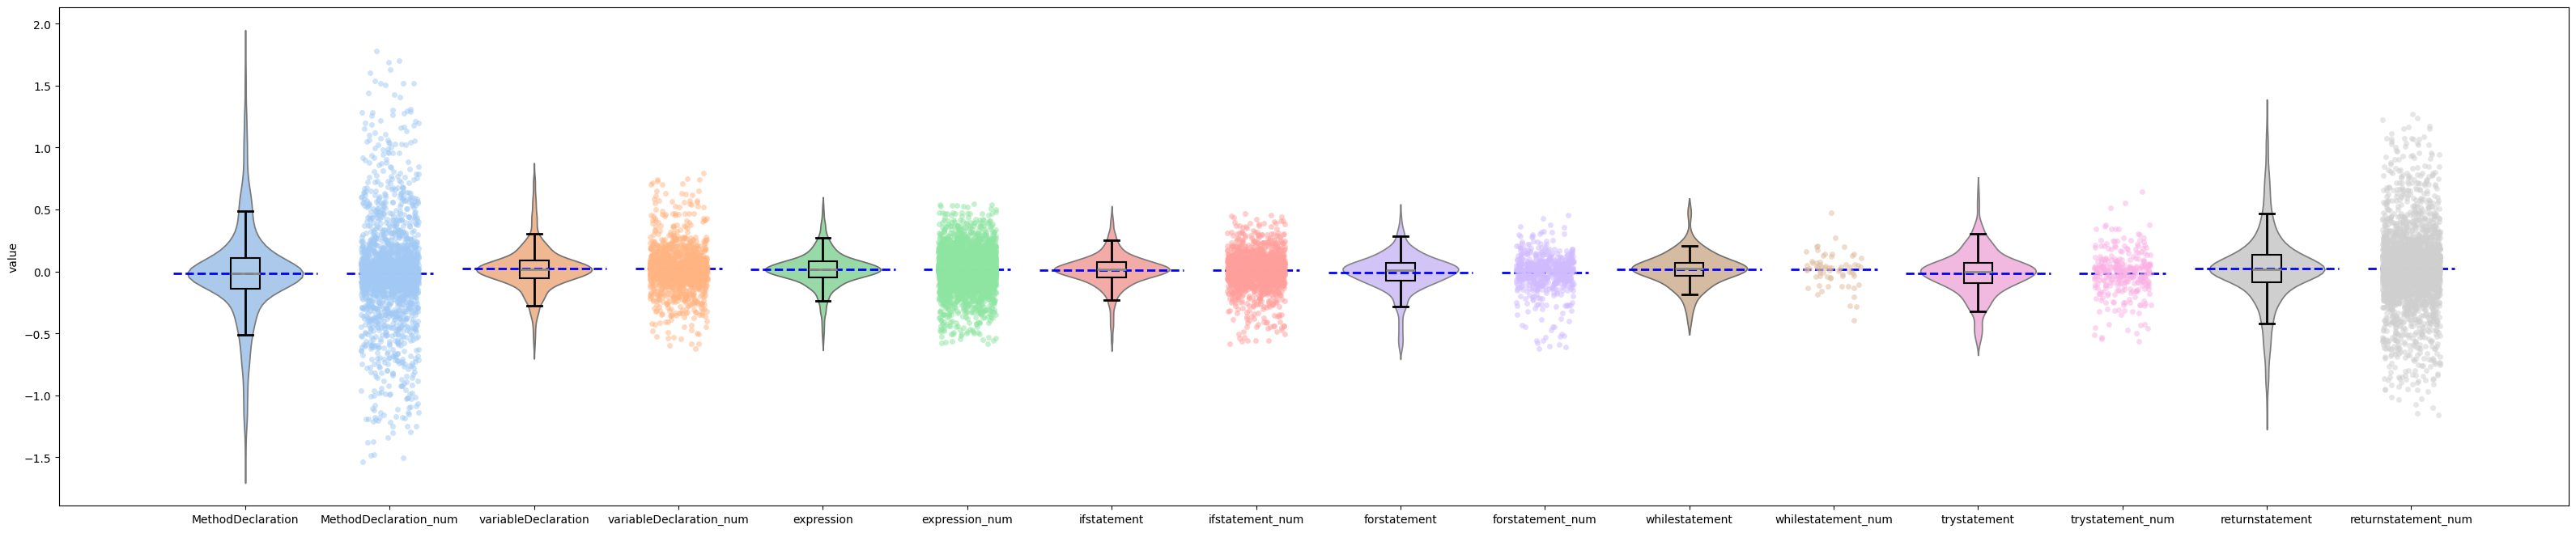

In [16]:
get_paper_picture(all_colunm_df_true_Winsorization,save_path='D:/BERT_learing/CCDP/picture/Winsorization_true_before_Abs_line.png')

In [17]:
all_colunm_df_Winsorization_true_abs = all_colunm_df_true_Winsorization.abs()
all_colunm_df_Winsorization_true_abs.head()

MethodDeclaration  variableDeclaration  expression  ifstatement  \
0           0.013571             0.191197    0.191197     0.224068   
1           0.412345             0.048397    0.048397     0.267434   
2           0.211686             0.266712    0.034493     0.034493   
3           0.023537             0.166484    0.050494     0.136808   
4           0.060836             0.050494    0.023919     0.031834   

   forstatement  whilestatement  trystatement  returnstatement  
0      0.131420        0.135945      0.087215         0.026822  
1      0.222676             NaN      0.005061         0.131420  
2           NaN        0.199363      0.145905         0.166484  
3           NaN        0.011297      0.041888         0.035449  
4           NaN        0.038573      0.003133         0.232338

均值 : 
MethodDeclaration      0.253571
variableDeclaration    0.120588
expression             0.098917
ifstatement            0.093396
forstatement           0.106293
whilestatement         0.095730
trystatement           0.127133
returnstatement        0.195553
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration      0.253571
returnstatement        0.195553
trystatement           0.127133
variableDeclaration    0.120588
forstatement           0.106293
expression             0.098917
whilestatement         0.095730
ifstatement            0.093396
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/Winsorization_true_Abs_line.png


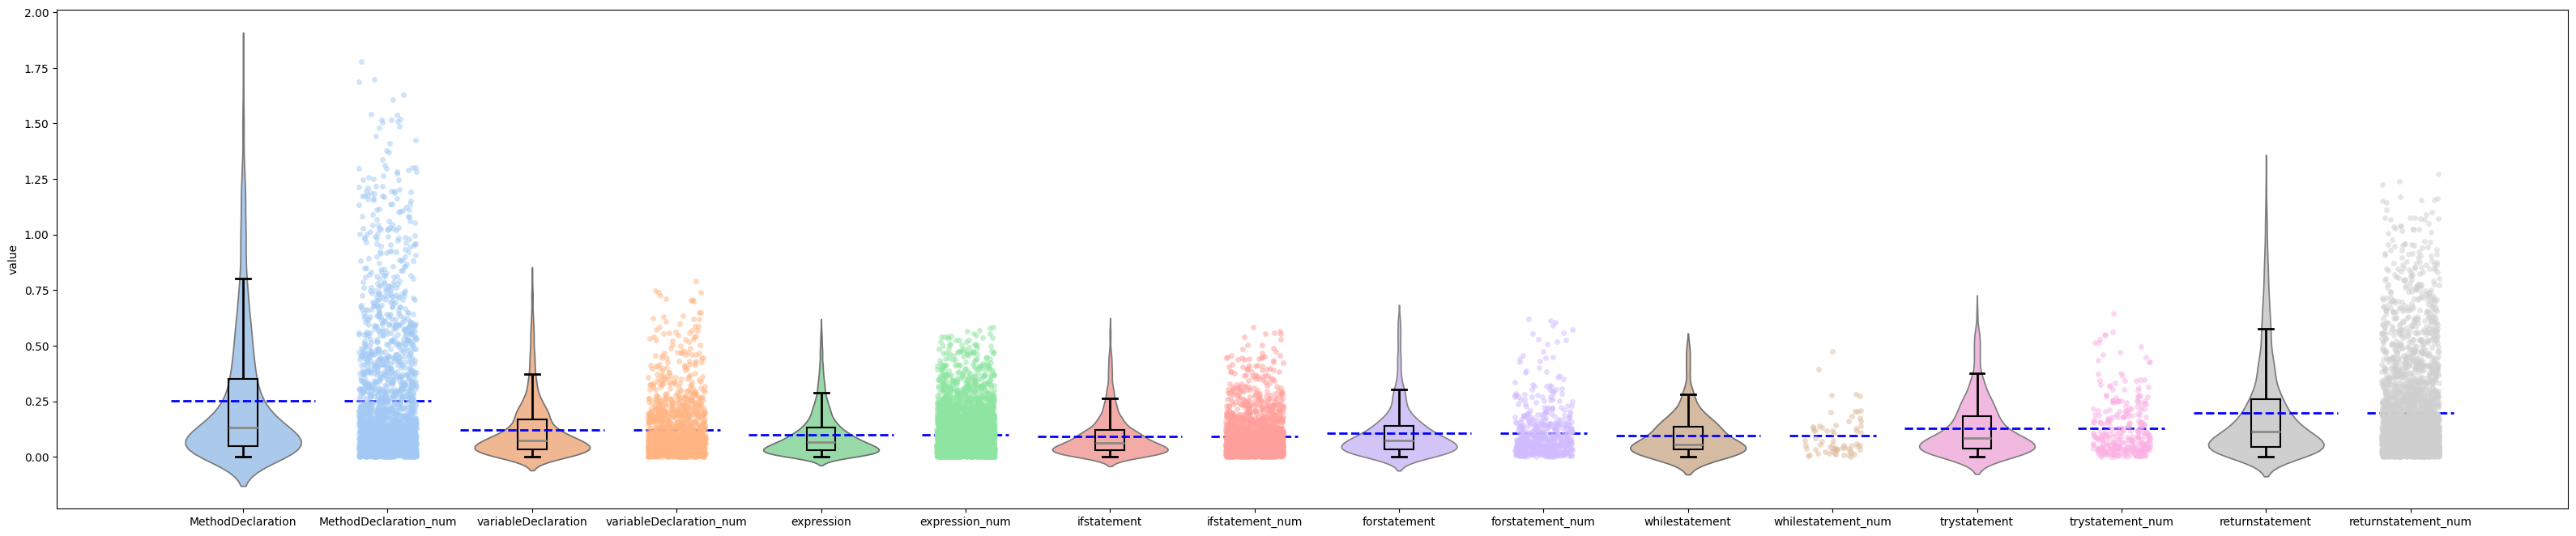

In [18]:
get_paper_picture(all_colunm_df_Winsorization_true_abs,save_path='D:/BERT_learing/CCDP/picture/Winsorization_true_Abs_line.png')

列 MethodDeclaration 的第1个分位数: -0.7529017255499999 	第99个分位数: 0.7260848669499999	此列删除数量218
列 variableDeclaration 的第1个分位数: -0.28472992500000005 	第99个分位数: 0.370305262	此列删除数量146
列 expression 的第1个分位数: -0.2445397641 	第99个分位数: 0.2624848884	此列删除数量410
列 ifstatement 的第1个分位数: -0.23935767180000003 	第99个分位数: 0.23570343875	此列删除数量184
列 forstatement 的第1个分位数: -0.3125581274 	第99个分位数: 0.22206981729999986	此列删除数量58
列 whilestatement 的第1个分位数: -0.2525205918 	第99个分位数: 0.205358941	此列删除数量8
列 trystatement 的第1个分位数: -0.3422913855 	第99个分位数: 0.2906350113999997	此列删除数量32
列 returnstatement 的第1个分位数: -0.5491374134 	第99个分位数: 0.5893000149999996	此列删除数量308
所有列的总共删除的数量: 1364
均值 : 
MethodDeclaration     -0.016728
variableDeclaration    0.019092
expression             0.017878
ifstatement            0.012738
forstatement          -0.002645
whilestatement         0.015644
trystatement          -0.011900
returnstatement        0.020202
dtype: float64

从大到小排序后的均值 : 
returnstatement        0.020202
variableDeclaration    0.019092
expr

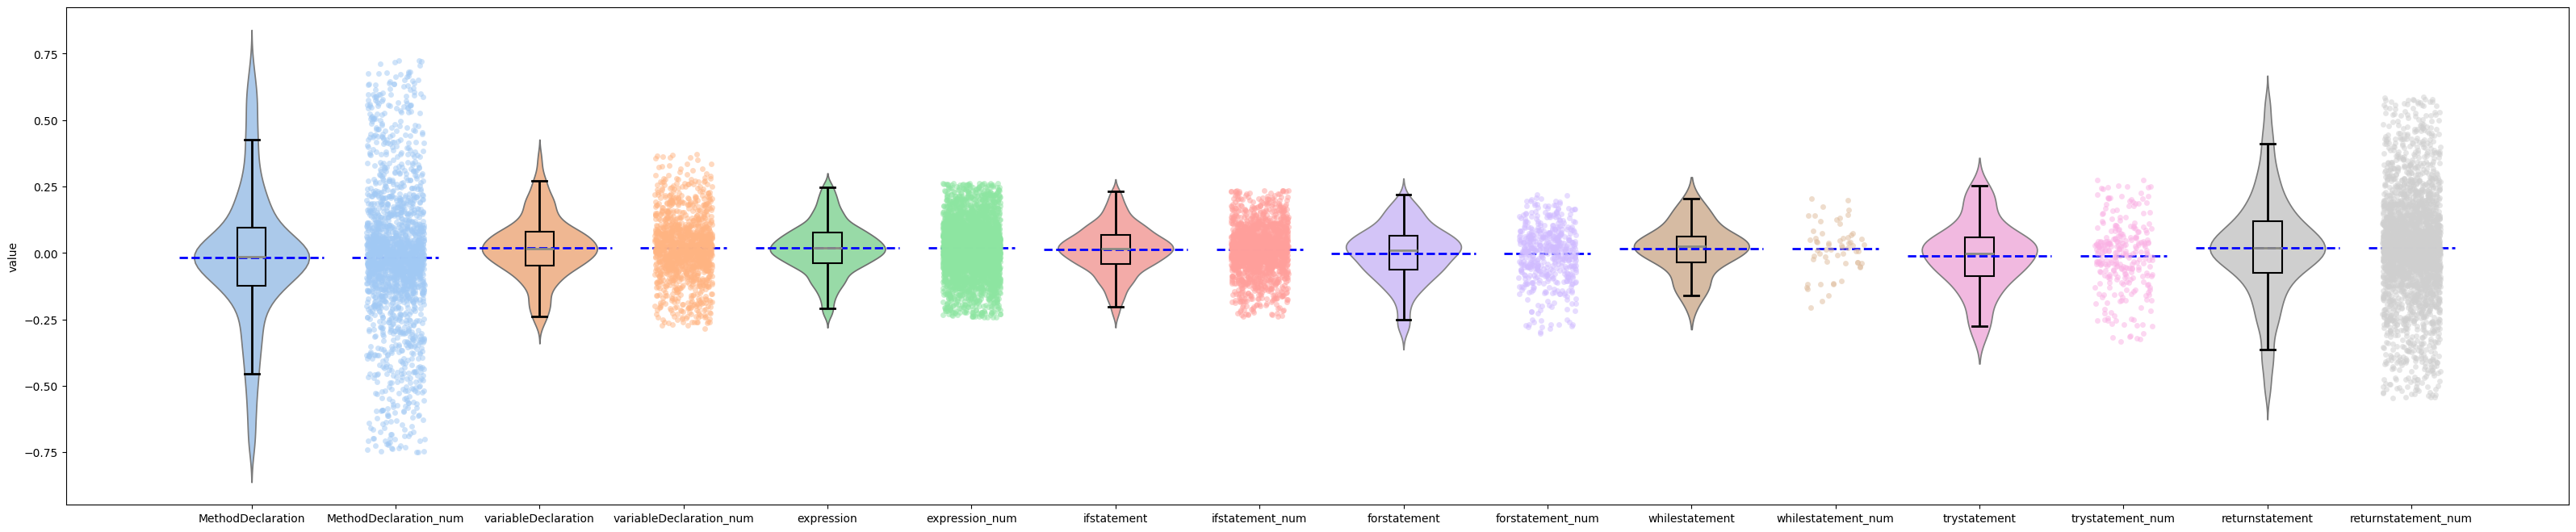

In [19]:
# 截尾处理 5%

def Winsorization_outliers_2(df):
    total_nan_count_new = 0  # 初始化总共删除的数量

    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = np.percentile(df[column_name].dropna(), 5)
        q3 = np.percentile(df[column_name].dropna(), 95)
        
        # 计算替换前的NaN数量
        nan_count_before = df[column_name].isna().sum()

        df[column_name] = df[column_name].apply(lambda x: np.nan if x < q1 or x > q3 else x)
        
        # 计算替换后的NaN数量
        nan_count_after = df[column_name].isna().sum()
        
        nan_count_new = nan_count_after - nan_count_before
               
        total_nan_count_new += nan_count_new    # 总共删除的数量
        
        print(f'列 {column_name} 的第1个分位数: {q1} \t第99个分位数: {q3}\t此列删除数量{nan_count_new}')
    print(f'所有列的总共删除的数量: {total_nan_count_new}')
    return df

all_colunm_df_true_for_Winsorization_5 = all_colunm_df_true.copy()
all_colunm_df_true_Winsorization_5 = Winsorization_outliers_2(all_colunm_df_true_for_Winsorization_5)

get_paper_picture(all_colunm_df_true_Winsorization_5,save_path='D:/BERT_learing/CCDP/picture/Winsorization_5%_true_before_Abs_line.png')

均值 : 
MethodDeclaration      0.182522
variableDeclaration    0.090523
expression             0.075875
ifstatement            0.071465
forstatement           0.080860
whilestatement         0.073527
trystatement           0.100179
returnstatement        0.144347
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration      0.182522
returnstatement        0.144347
trystatement           0.100179
variableDeclaration    0.090523
forstatement           0.080860
expression             0.075875
whilestatement         0.073527
ifstatement            0.071465
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/Winsorization_5%_true_Abs_line.png


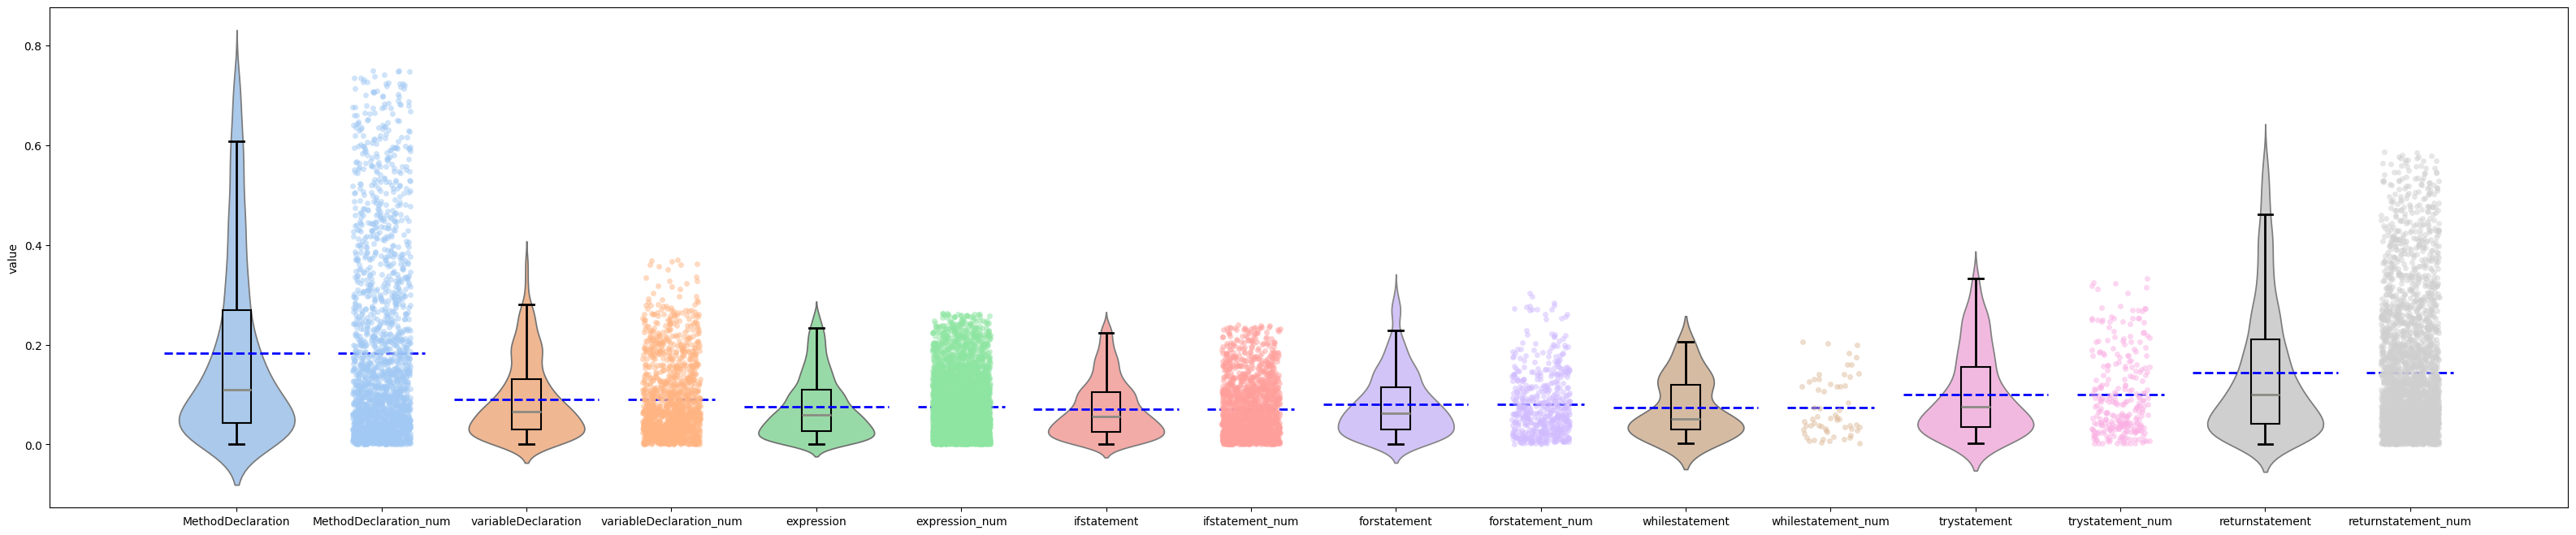

In [20]:
all_colunm_df_Winsorization_true_5_abs = all_colunm_df_true_Winsorization_5.abs()
get_paper_picture(all_colunm_df_Winsorization_true_5_abs,save_path='D:/BERT_learing/CCDP/picture/Winsorization_5%_true_Abs_line.png')

In [21]:
# 四分位距法
def iqr_outliers(df):
    total_nan_count_new = 0  # 初始化总共删除的数量

    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        
        # 计算替换前的NaN数量
        nan_count_before = df[column_name].isna().sum()

        df[column_name] = df[column_name].apply(lambda x: np.nan if x < Lower_tail or x > Upper_tail else x)
        
        # 计算替换后的NaN数量
        nan_count_after = df[column_name].isna().sum()
        
        nan_count_new = nan_count_after - nan_count_before
               
        total_nan_count_new += nan_count_new    # 总共删除的数量
        print(f'下四分位数: {q1}, 上四分位数: {q3}, 最小值下界: {Lower_tail}, 最大值上界: {Upper_tail}\t此列删除数量{nan_count_new}')
    print(f'所有列的总共删除的数量: {total_nan_count_new}')
    return df

all_colunm_df_true_for_iqr = all_colunm_df_true.copy()
all_colunm_df_true_iqr = iqr_outliers(all_colunm_df_true_for_iqr)

下四分位数: -0.14422835875, 上四分位数: 0.11582931175000001, 最小值下界: -0.5343148645, 最大值上界: 0.5059158175	此列删除数量379
下四分位数: -0.0566338, 上四分位数: 0.092249568, 最小值下界: -0.27995885200000004, 最大值上界: 0.31557462000000003	此列删除数量162
下四分位数: -0.047109599, 上四分位数: 0.08409236850000001, 最小值下界: -0.24391255025000003, 最大值上界: 0.28089531975000004	此列删除数量383
下四分位数: -0.049094056500000004, 上四分位数: 0.07909114075000001, 最小值下界: -0.24137185237500006, 最大值上界: 0.27136893662500006	此列删除数量163
下四分位数: -0.0771169565, 上四分位数: 0.0738741835, 最小值下界: -0.3036036665, 最大值上界: 0.30036089349999995	此列删除数量47
下四分位数: -0.038585701, 上四分位数: 0.07311296475000001, 最小值下界: -0.20613369962500003, 最大值上界: 0.24066096337500004	此列删除数量7
下四分位数: -0.094124529, 上四分位数: 0.07584775700000002, 最小值下界: -0.34908295800000005, 最大值上界: 0.33080618600000006	此列删除数量29
下四分位数: -0.09212901000000001, 上四分位数: 0.136373932, 最小值下界: -0.43488342300000005, 最大值上界: 0.479128345	此列删除数量414
所有列的总共删除的数量: 1584


均值 : 
MethodDeclaration     -0.018693
variableDeclaration    0.015560
expression             0.019723
ifstatement            0.015444
forstatement           0.003854
whilestatement         0.018774
trystatement          -0.010856
returnstatement        0.021247
dtype: float64

从大到小排序后的均值 : 
returnstatement        0.021247
expression             0.019723
whilestatement         0.018774
variableDeclaration    0.015560
ifstatement            0.015444
forstatement           0.003854
trystatement          -0.010856
MethodDeclaration     -0.018693
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/iqr_true_before_Abs_line.png


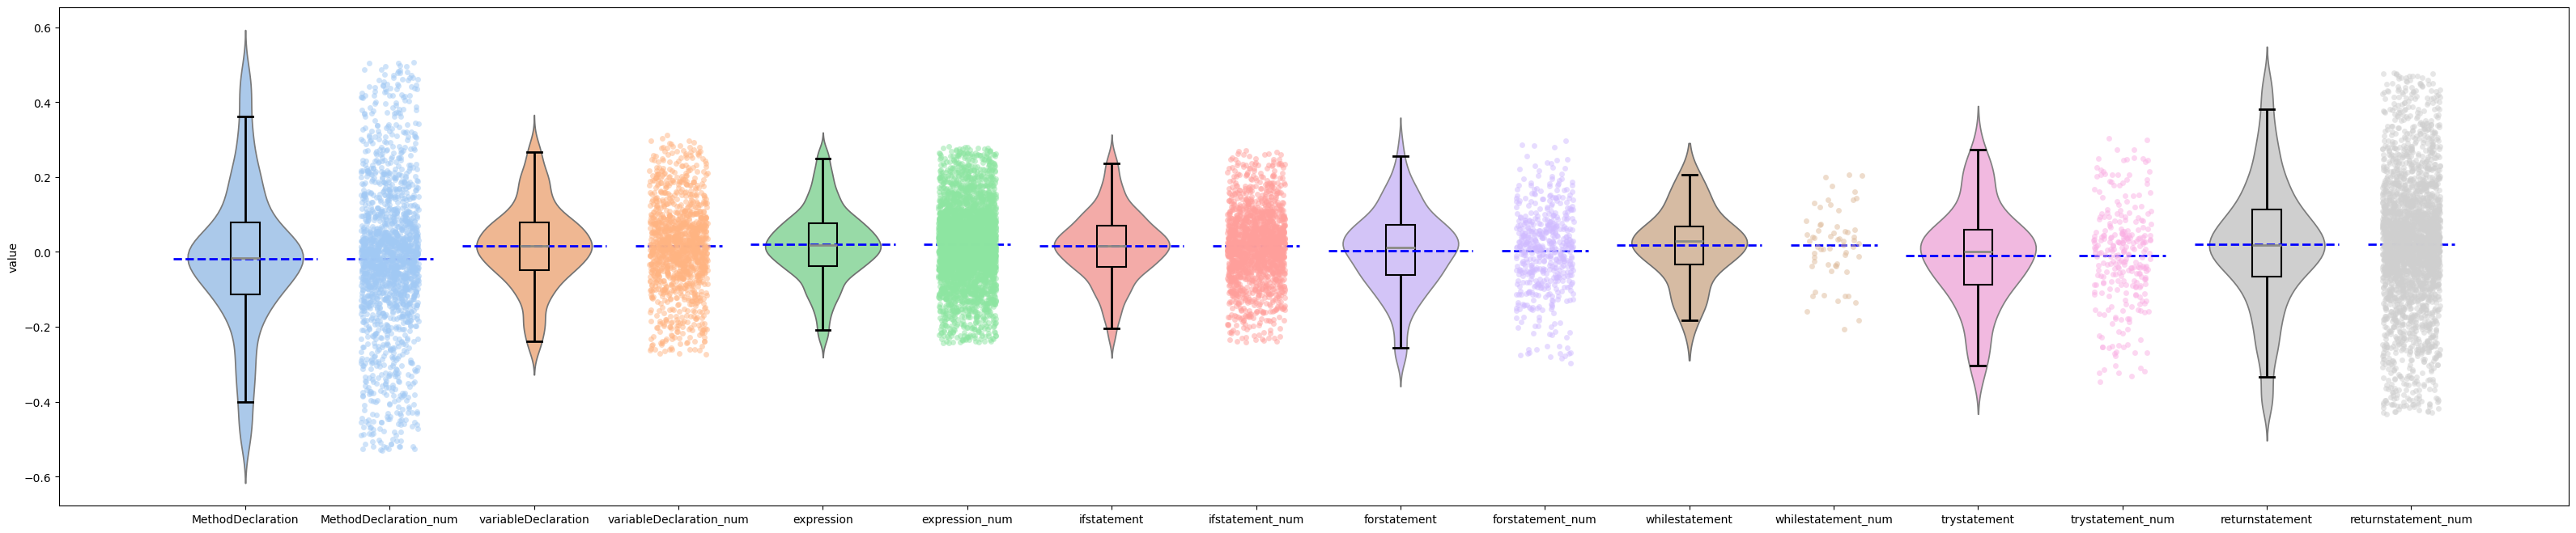

In [22]:
get_paper_picture(all_colunm_df_true_iqr,save_path='D:/BERT_learing/CCDP/picture/iqr_true_before_Abs_line.png')

In [23]:
all_colunm_df_iqr_true_abs = all_colunm_df_true_iqr.abs()
all_colunm_df_iqr_true_abs.head()

MethodDeclaration  variableDeclaration  expression  ifstatement  \
0           0.013571             0.191197    0.191197     0.224068   
1           0.412345             0.048397    0.048397     0.267434   
2           0.211686             0.266712    0.034493     0.034493   
3           0.023537             0.166484    0.050494     0.136808   
4           0.060836             0.050494    0.023919     0.031834   

   forstatement  whilestatement  trystatement  returnstatement  
0      0.131420        0.135945      0.087215         0.026822  
1      0.222676             NaN      0.005061         0.131420  
2           NaN        0.199363      0.145905         0.166484  
3           NaN        0.011297      0.041888         0.035449  
4           NaN        0.038573      0.003133         0.232338

均值 : 
MethodDeclaration      0.143263
variableDeclaration    0.087433
expression             0.077297
ifstatement            0.073722
forstatement           0.084424
whilestatement         0.075708
trystatement           0.102507
returnstatement        0.129656
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration      0.143263
returnstatement        0.129656
trystatement           0.102507
variableDeclaration    0.087433
forstatement           0.084424
expression             0.077297
whilestatement         0.075708
ifstatement            0.073722
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/iqr_true_Abs_line.png


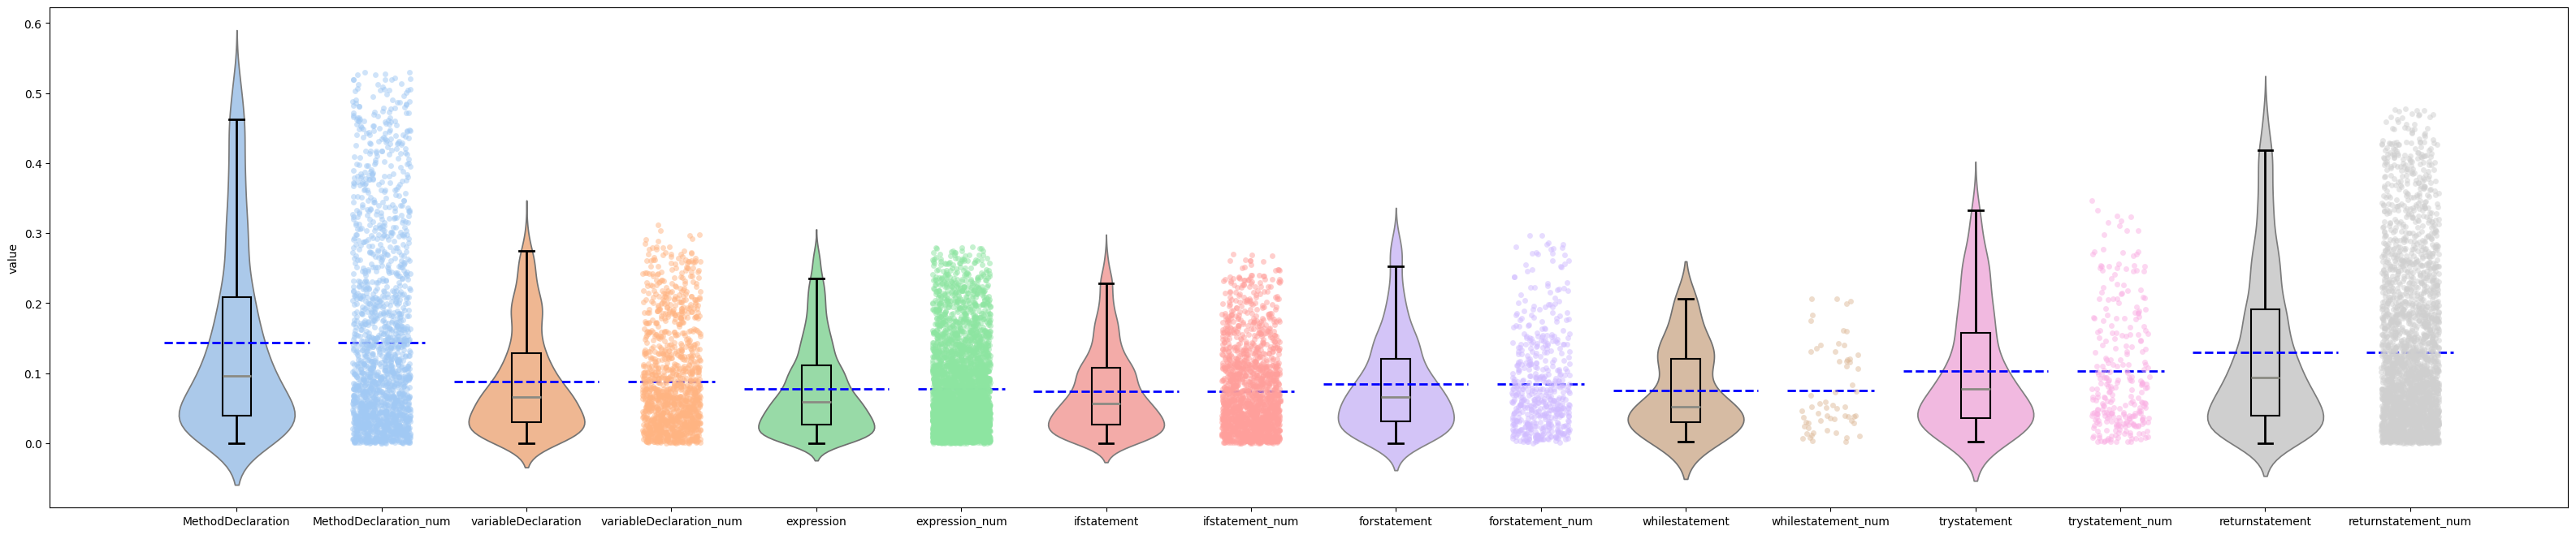

In [24]:
get_paper_picture(all_colunm_df_iqr_true_abs,save_path='D:/BERT_learing/CCDP/picture/iqr_true_Abs_line.png')

false

In [25]:
all_colunm_df_false = get_all_colunm_df(linelevel_attribution_false,line_type)
all_colunm_df_false.head()

MethodDeclaration  variableDeclaration  expression  ifstatement  \
0          -0.012378             0.193835    0.193835    -0.052063   
1          -0.131840             0.139482   -0.052063    -0.042921   
2          -0.425897            -0.202758   -0.364585    -0.072009   
3           1.048487            -0.364585   -0.091895    -0.146474   
4           0.224376            -0.091895   -0.140216    -0.477257   

   forstatement  whilestatement  trystatement  returnstatement  
0     -0.015434        0.028533     -0.015434         0.139482  
1      0.031946       -0.025739     -0.052992        -0.202758  
2     -0.030566        0.130149     -0.042921        -0.176777  
3     -0.074697        0.895594     -0.074167        -2.430000  
4      0.166823        0.237688     -0.043912         0.548456

In [26]:
std_value = all_colunm_df_false.std()
std_value

MethodDeclaration      0.521774
variableDeclaration    0.251430
expression             0.182197
ifstatement            0.172235
forstatement           0.171067
whilestatement         0.281131
trystatement           0.176106
returnstatement        0.408748
dtype: float64

均值 : 
MethodDeclaration     -0.010966
variableDeclaration    0.012231
expression             0.005447
ifstatement            0.012324
forstatement           0.015566
whilestatement         0.001811
trystatement           0.017562
returnstatement        0.004467
dtype: float64

从大到小排序后的均值 : 
trystatement           0.017562
forstatement           0.015566
ifstatement            0.012324
variableDeclaration    0.012231
expression             0.005447
returnstatement        0.004467
whilestatement         0.001811
MethodDeclaration     -0.010966
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/原始图片_false_before_Abs_line.png


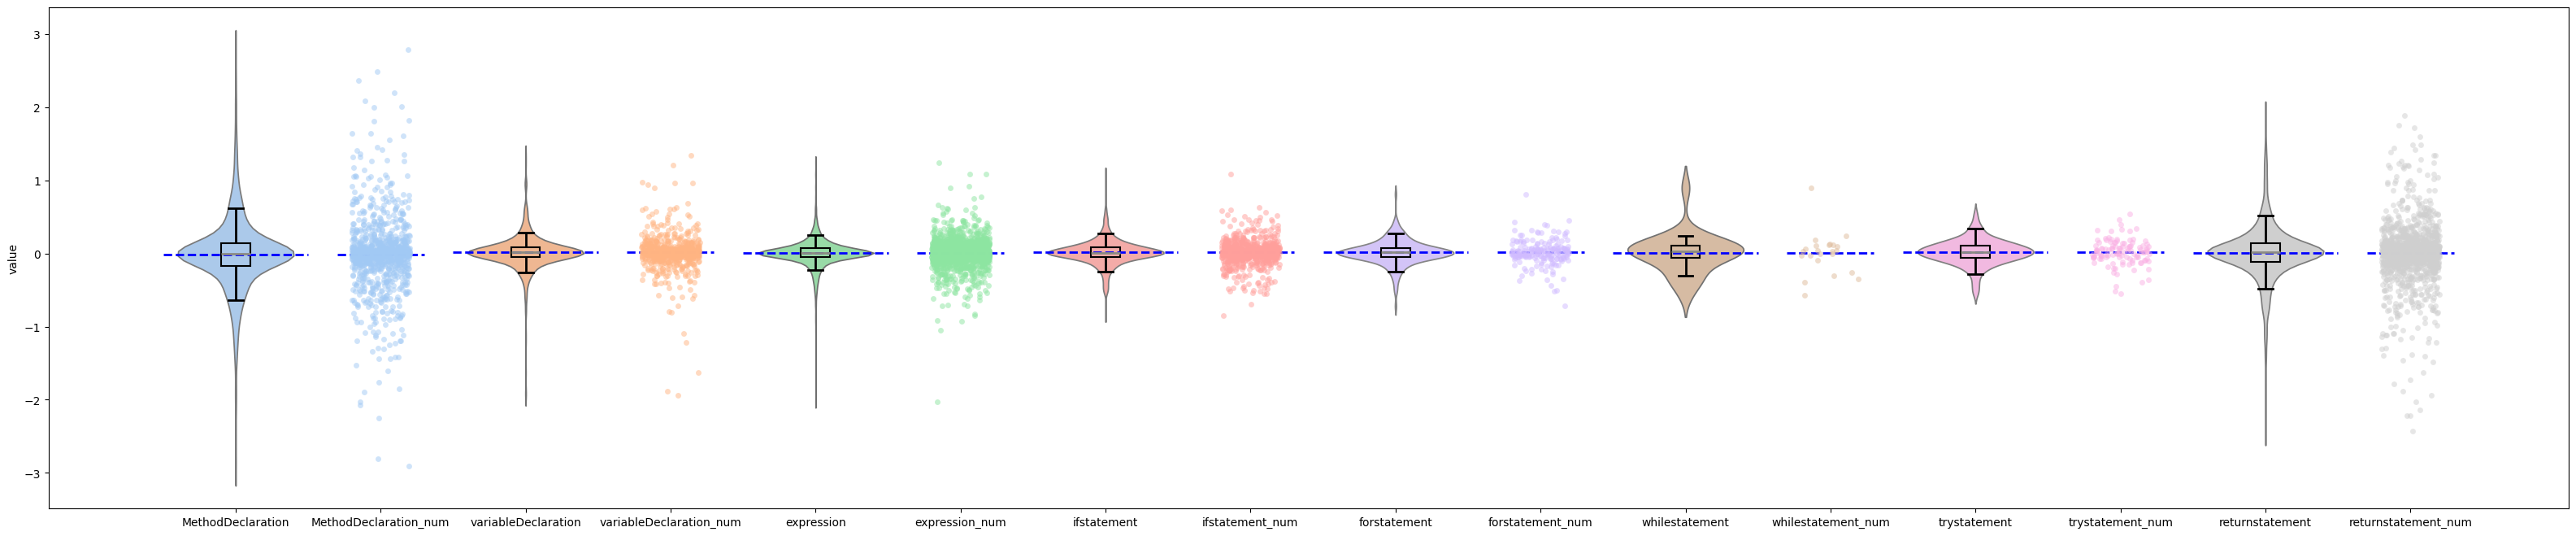

In [27]:
get_paper_picture(all_colunm_df_false,save_path='D:/BERT_learing/CCDP/picture/原始图片_false_before_Abs_line.png')

绝对值均值

In [28]:
all_colunm_df_false_abs = all_colunm_df_false.abs()
all_colunm_df_false_abs.head()

MethodDeclaration  variableDeclaration  expression  ifstatement  \
0           0.012378             0.193835    0.193835     0.052063   
1           0.131840             0.139482    0.052063     0.042921   
2           0.425897             0.202758    0.364585     0.072009   
3           1.048487             0.364585    0.091895     0.146474   
4           0.224376             0.091895    0.140216     0.477257   

   forstatement  whilestatement  trystatement  returnstatement  
0      0.015434        0.028533      0.015434         0.139482  
1      0.031946        0.025739      0.052992         0.202758  
2      0.030566        0.130149      0.042921         0.176777  
3      0.074697        0.895594      0.074167         2.430000  
4      0.166823        0.237688      0.043912         0.548456

均值 : 
MethodDeclaration      0.320285
variableDeclaration    0.138849
expression             0.110752
ifstatement            0.114660
forstatement           0.115220
whilestatement         0.178806
trystatement           0.127914
returnstatement        0.247453
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration      0.320285
returnstatement        0.247453
whilestatement         0.178806
variableDeclaration    0.138849
trystatement           0.127914
forstatement           0.115220
ifstatement            0.114660
expression             0.110752
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/原始图片_false_Abs_line.png


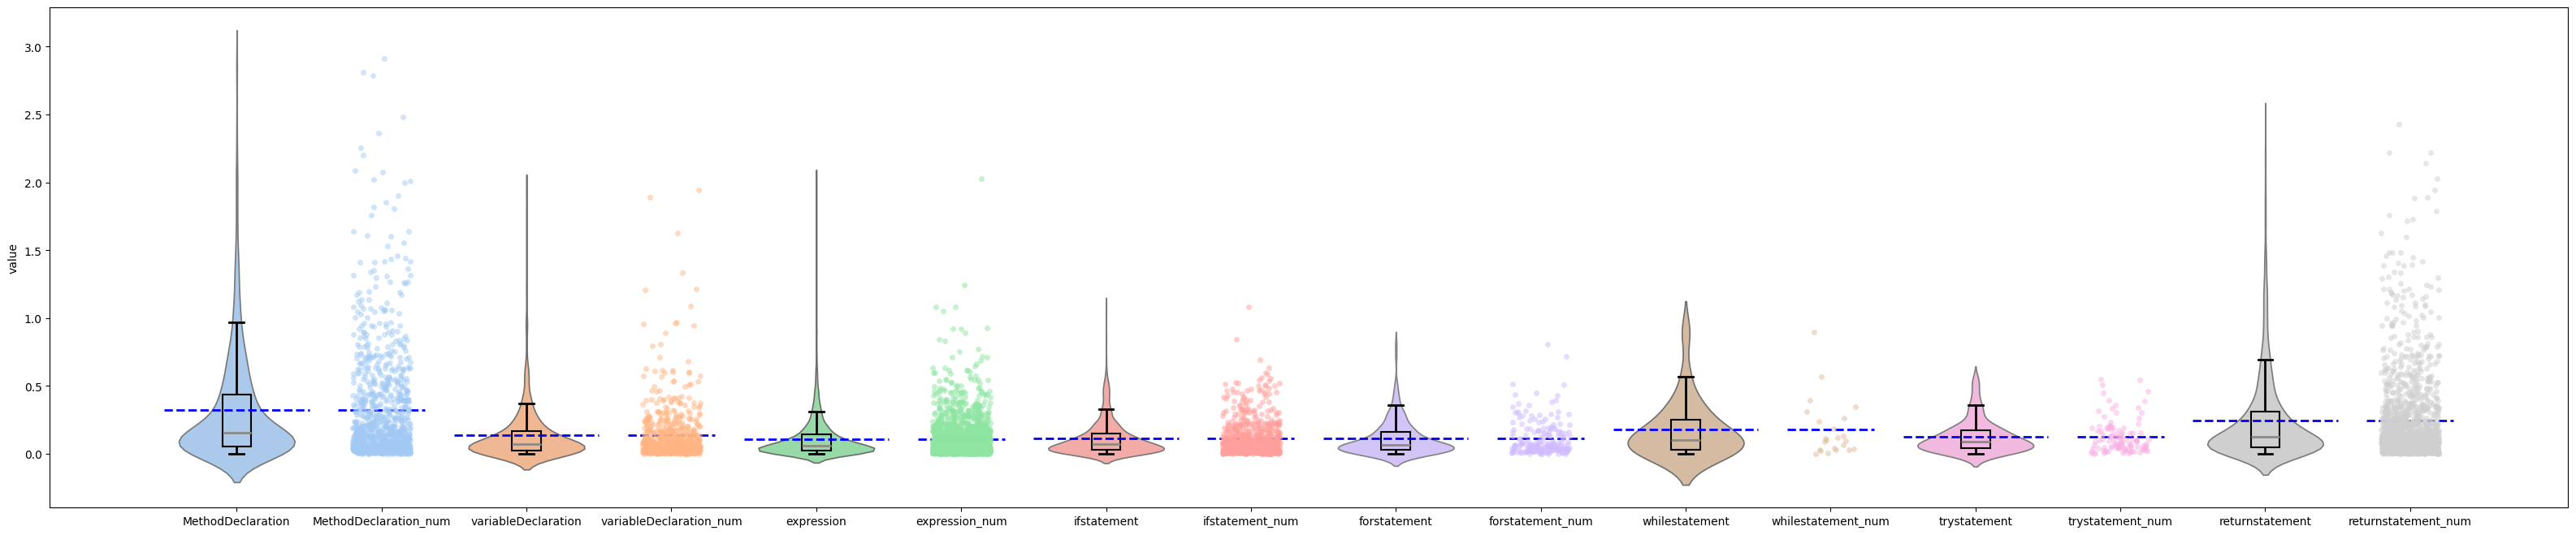

In [29]:
get_paper_picture(all_colunm_df_false_abs,save_path='D:/BERT_learing/CCDP/picture/原始图片_false_Abs_line.png')

In [30]:
all_colunm_df_false_for_Winsorization = all_colunm_df_false.copy()
all_colunm_df_false_Winsorization = Winsorization_outliers(all_colunm_df_false_for_Winsorization)

列 MethodDeclaration 的第1个分位数: -1.47390020628 	第99个分位数: 1.64044497428	此列删除数量20
列 variableDeclaration 的第1个分位数: -0.75646301781 	第99个分位数: 0.7923936659799942	此列删除数量14
列 expression 的第1个分位数: -0.5450521511900001 	第99个分位数: 0.49759185793999805	此列删除数量36
列 ifstatement 的第1个分位数: -0.50479301836 	第99个分位数: 0.5031598272799997	此列删除数量16
列 forstatement 的第1个分位数: -0.5059817396 	第99个分位数: 0.42969988800000025	此列删除数量4
列 whilestatement 的第1个分位数: -0.53025835394 	第99个分位数: 0.7508544748800008	此列删除数量2
列 trystatement 的第1个分位数: -0.50409352816 	第99个分位数: 0.4541694656799997	此列删除数量4
列 returnstatement 的第1个分位数: -1.39084845568 	第99个分位数: 1.237433398160001	此列删除数量28
所有列的总共删除的数量: 124


均值 : 
MethodDeclaration     -0.011694
variableDeclaration    0.015795
expression             0.006117
ifstatement            0.012193
forstatement           0.015750
whilestatement        -0.013586
trystatement           0.018717
returnstatement        0.008414
dtype: float64

从大到小排序后的均值 : 
trystatement           0.018717
variableDeclaration    0.015795
forstatement           0.015750
ifstatement            0.012193
returnstatement        0.008414
expression             0.006117
MethodDeclaration     -0.011694
whilestatement        -0.013586
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/Winsorization_false_before_Abs_line.png


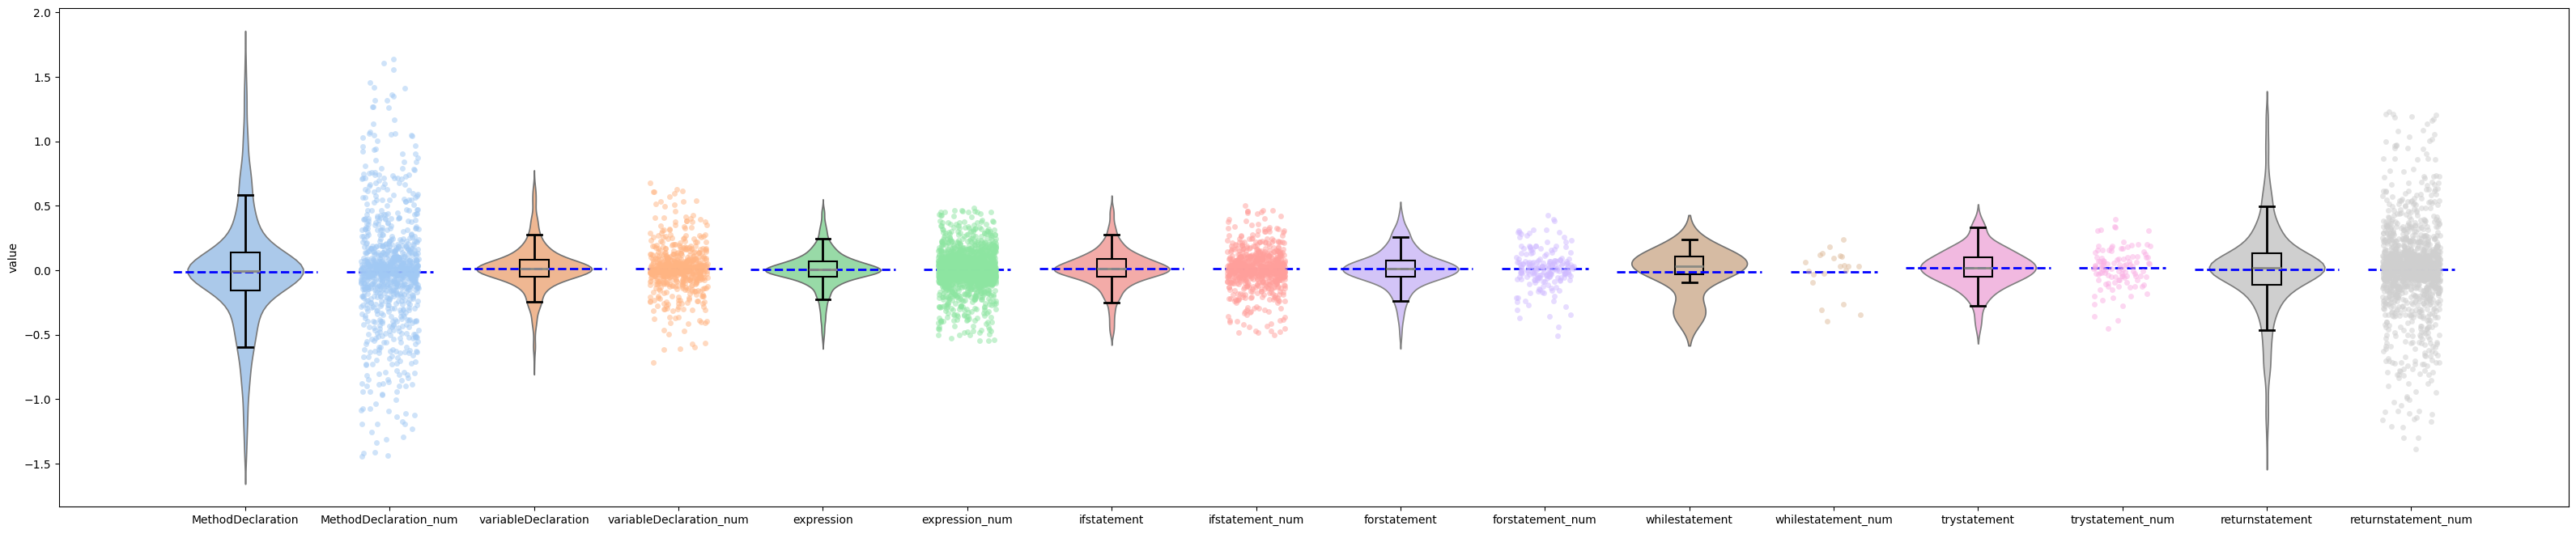

In [31]:
get_paper_picture(all_colunm_df_false_Winsorization,save_path='D:/BERT_learing/CCDP/picture/Winsorization_false_before_Abs_line.png')

列 MethodDeclaration 的第1个分位数: -0.8296319024000001 	第99个分位数: 0.7825503961999996	此列删除数量98
列 variableDeclaration 的第1个分位数: -0.30093008655000003 	第99个分位数: 0.3527927259499999	此列删除数量66
列 expression 的第1个分位数: -0.28131316115000005 	第99个分位数: 0.26946293249999986	此列删除数量178
列 ifstatement 的第1个分位数: -0.28503044 	第99个分位数: 0.2746235313999999	此列删除数量76
列 forstatement 的第1个分位数: -0.25281210675 	第99个分位数: 0.293724028	此列删除数量20
列 whilestatement 的第1个分位数: -0.3893412687 	第99个分位数: 0.23220536139999992	此列删除数量4
列 trystatement 的第1个分位数: -0.2673564318 	第99个分位数: 0.3092963991999999	此列删除数量12
列 returnstatement 的第1个分位数: -0.6670989934 	第99个分位数: 0.5908670440000003	此列删除数量136
所有列的总共删除的数量: 590
均值 : 
MethodDeclaration     -0.014203
variableDeclaration    0.014711
expression             0.008196
ifstatement            0.013924
forstatement           0.017967
whilestatement        -0.006778
trystatement           0.021116
returnstatement        0.010975
dtype: float64

从大到小排序后的均值 : 
trystatement           0.021116
forstatement          

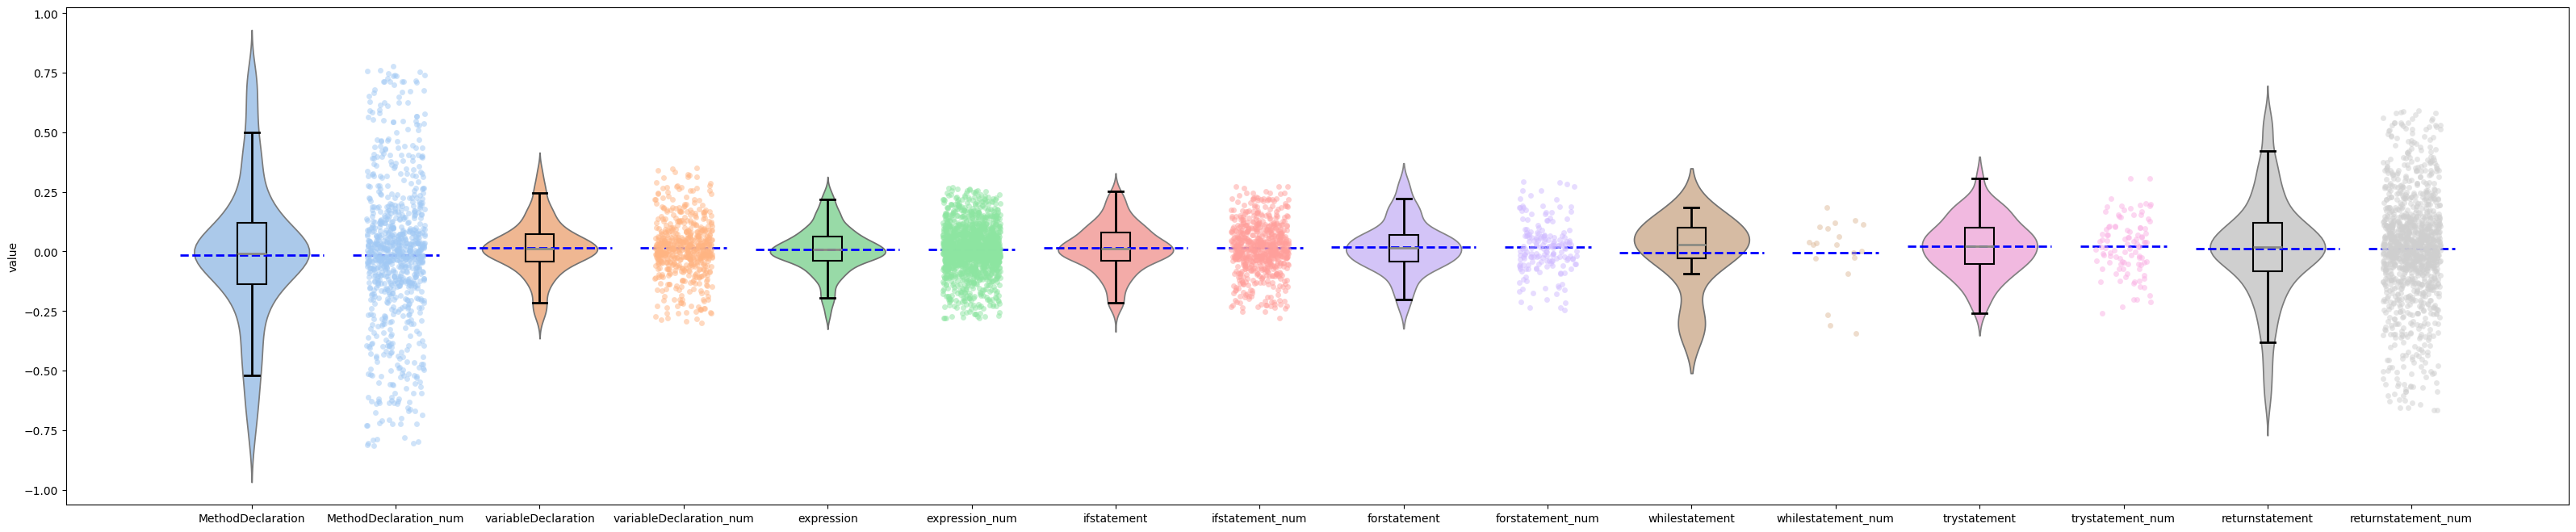

In [32]:
all_colunm_df_false_for_Winsorization_5 = all_colunm_df_false.copy()
all_colunm_df_false_Winsorization_5 = Winsorization_outliers_2(all_colunm_df_false_for_Winsorization_5)

get_paper_picture(all_colunm_df_false_Winsorization_5,save_path='D:/BERT_learing/CCDP/picture/Winsorization_5%_false_before_Abs_line.png')

均值 : 
MethodDeclaration      0.210194
variableDeclaration    0.085216
expression             0.073206
ifstatement            0.079513
forstatement           0.082281
whilestatement         0.106127
trystatement           0.094333
returnstatement        0.159026
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration      0.210194
returnstatement        0.159026
whilestatement         0.106127
trystatement           0.094333
variableDeclaration    0.085216
forstatement           0.082281
ifstatement            0.079513
expression             0.073206
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/Winsorization_5%_false_Abs_line.png


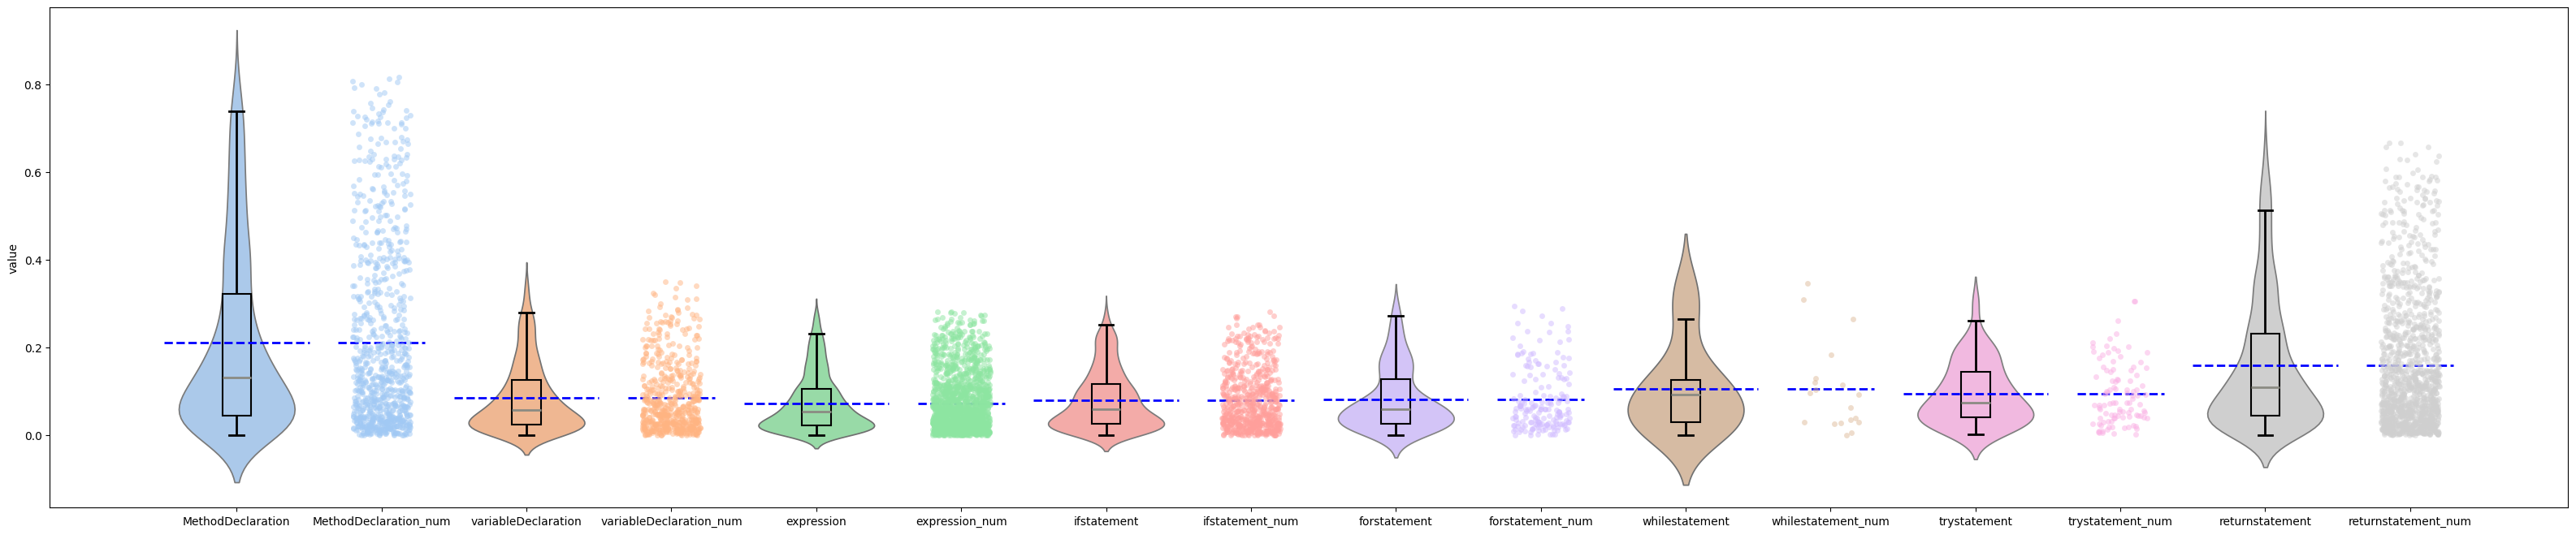

In [33]:
all_colunm_df_Winsorization_false_5_abs = all_colunm_df_false_Winsorization_5.abs()
get_paper_picture(all_colunm_df_Winsorization_false_5_abs,save_path='D:/BERT_learing/CCDP/picture/Winsorization_5%_false_Abs_line.png')

In [34]:
all_colunm_df_Winsorization_false_abs = all_colunm_df_false_Winsorization.abs()
all_colunm_df_Winsorization_false_abs.head()

MethodDeclaration  variableDeclaration  expression  ifstatement  \
0           0.012378             0.193835    0.193835     0.052063   
1           0.131840             0.139482    0.052063     0.042921   
2           0.425897             0.202758    0.364585     0.072009   
3           1.048487             0.364585    0.091895     0.146474   
4           0.224376             0.091895    0.140216     0.477257   

   forstatement  whilestatement  trystatement  returnstatement  
0      0.015434        0.028533      0.015434         0.139482  
1      0.031946        0.025739      0.052992         0.202758  
2      0.030566        0.130149      0.042921         0.176777  
3      0.074697             NaN      0.074167              NaN  
4      0.166823        0.237688      0.043912         0.548456

均值 : 
MethodDeclaration      0.282715
variableDeclaration    0.115667
expression             0.097263
ifstatement            0.103827
forstatement           0.104637
whilestatement         0.126110
trystatement           0.113644
returnstatement        0.217763
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration      0.282715
returnstatement        0.217763
whilestatement         0.126110
variableDeclaration    0.115667
trystatement           0.113644
forstatement           0.104637
ifstatement            0.103827
expression             0.097263
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/Winsorization_false_Abs_line.png


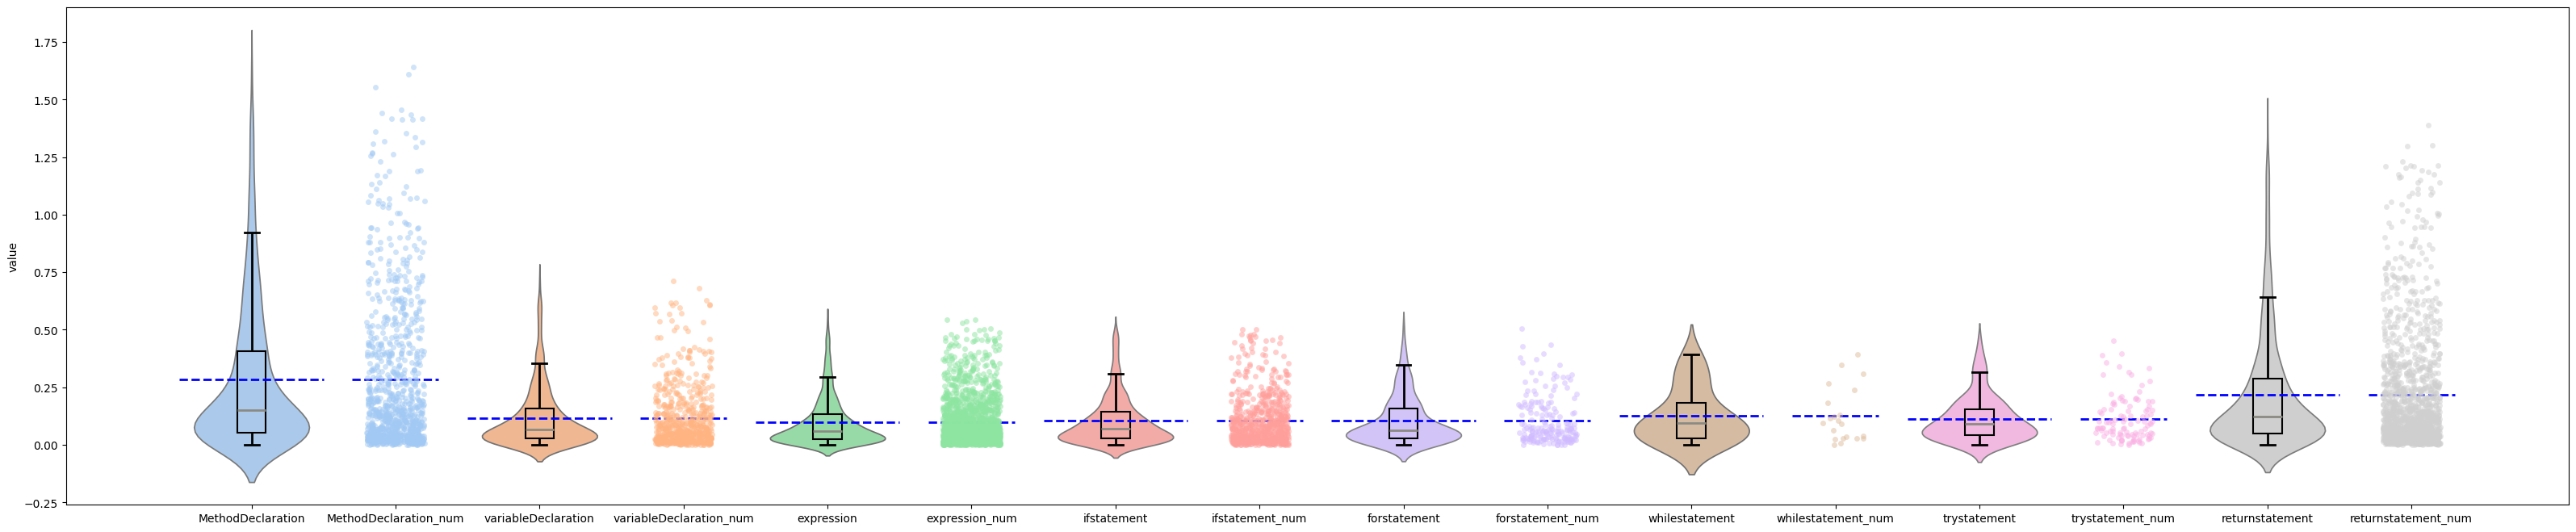

In [35]:
get_paper_picture(all_colunm_df_Winsorization_false_abs,save_path='D:/BERT_learing/CCDP/picture/Winsorization_false_Abs_line.png')

In [36]:
all_colunm_df_false_for_iqr = all_colunm_df_false.copy()
all_colunm_df_false_iqr = iqr_outliers(all_colunm_df_false_for_iqr)

下四分位数: -0.16839966099999998, 上四分位数: 0.145037152, 最小值下界: -0.6385548804999999, 最大值上界: 0.6151923715	此列删除数量152
下四分位数: -0.05287278925, 上四分位数: 0.08358321375000001, 最小值下界: -0.25755679375, 最大值上界: 0.28826721825	此列删除数量85
下四分位数: -0.049042171, 上四分位数: 0.0718462945, 最小值下界: -0.23037486925000003, 最大值上界: 0.25317899275000005	此列删除数量211
下四分位数: -0.050416134, 上四分位数: 0.08885790000000002, 最小值下界: -0.259327185, 最大值上界: 0.297768951	此列删除数量75
下四分位数: -0.05304345825, 上四分位数: 0.07831115125, 最小值下界: -0.2500753725, 最大值上界: 0.2753430655	此列删除数量23
下四分位数: -0.0607881455, 上四分位数: 0.1092668175, 最小值下界: -0.31587059, 最大值上界: 0.364349262	此列删除数量4
下四分位数: -0.056428278, 上四分位数: 0.103169069, 最小值下界: -0.2958242985, 最大值上界: 0.3425650895	此列删除数量8
下四分位数: -0.1153265, 上四分位数: 0.138486242, 最小值下界: -0.49604561300000005, 最大值上界: 0.5192053550000001	此列删除数量193
所有列的总共删除的数量: 751


均值 : 
MethodDeclaration     -0.017792
variableDeclaration    0.013879
expression             0.011169
ifstatement            0.015147
forstatement           0.013278
whilestatement         0.023917
trystatement           0.027084
returnstatement        0.019317
dtype: float64

从大到小排序后的均值 : 
trystatement           0.027084
whilestatement         0.023917
returnstatement        0.019317
ifstatement            0.015147
variableDeclaration    0.013879
forstatement           0.013278
expression             0.011169
MethodDeclaration     -0.017792
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/iqr_false_before_Abs_line.png


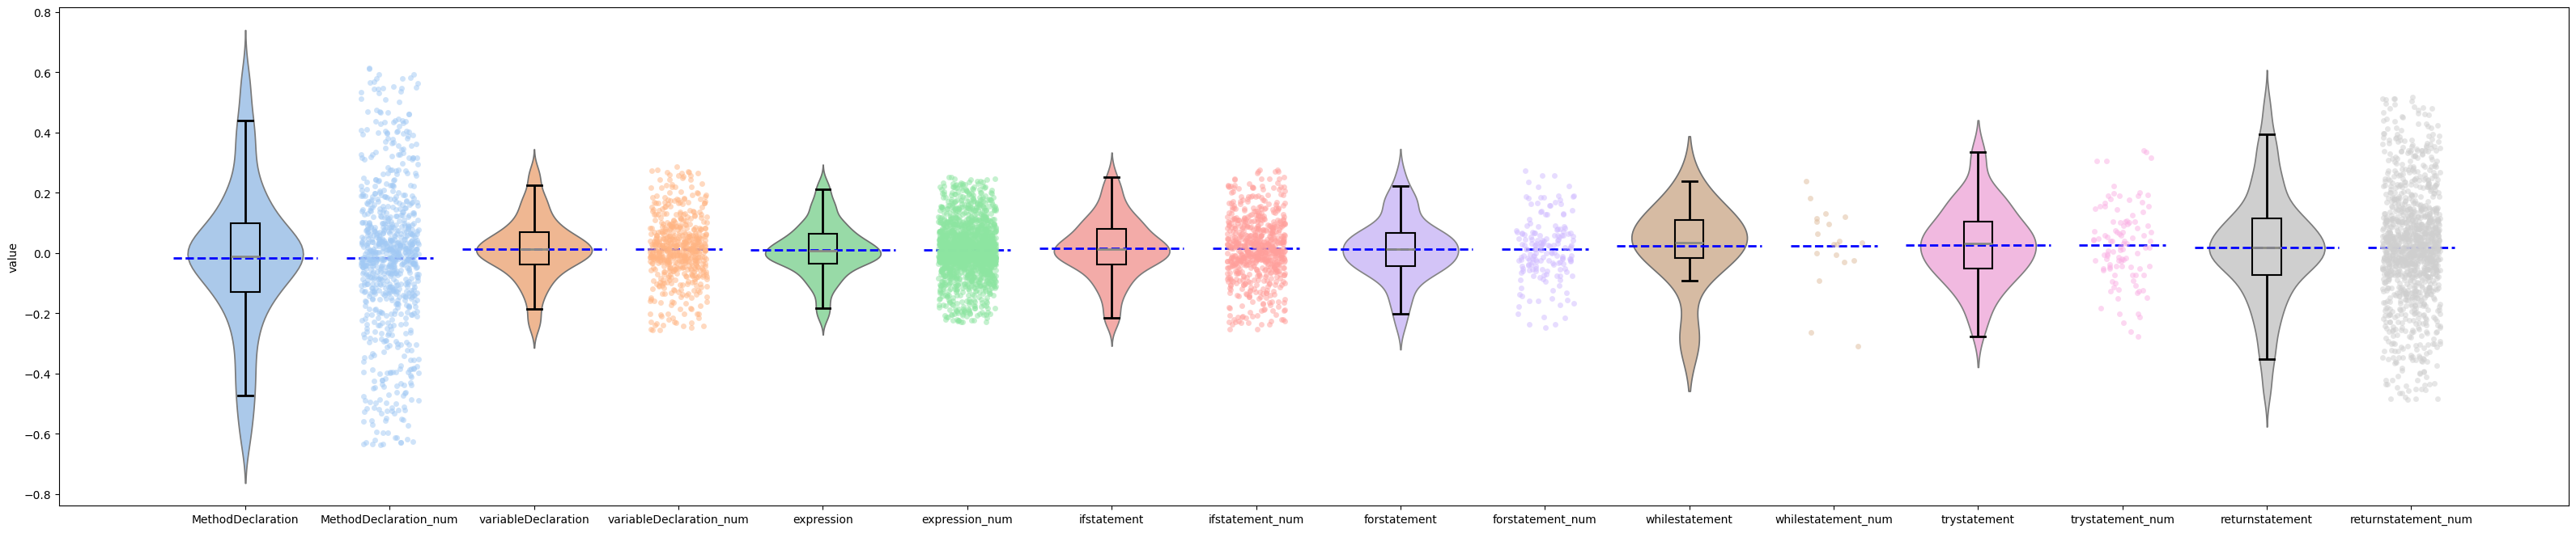

In [37]:
get_paper_picture(all_colunm_df_false_iqr,save_path='D:/BERT_learing/CCDP/picture/iqr_false_before_Abs_line.png')

In [38]:
all_colunm_df_iqr_false_abs = all_colunm_df_false_iqr.abs()
all_colunm_df_iqr_false_abs.head()

MethodDeclaration  variableDeclaration  expression  ifstatement  \
0           0.012378             0.193835    0.193835     0.052063   
1           0.131840             0.139482    0.052063     0.042921   
2           0.425897             0.202758         NaN     0.072009   
3                NaN                  NaN    0.091895     0.146474   
4           0.224376             0.091895    0.140216          NaN   

   forstatement  whilestatement  trystatement  returnstatement  
0      0.015434        0.028533      0.015434         0.139482  
1      0.031946        0.025739      0.052992         0.202758  
2      0.030566        0.130149      0.042921         0.176777  
3      0.074697             NaN      0.074167              NaN  
4      0.166823        0.237688      0.043912              NaN

均值 : 
MethodDeclaration      0.176804
variableDeclaration    0.077909
expression             0.069286
ifstatement            0.079798
forstatement           0.078707
whilestatement         0.100451
trystatement           0.102803
returnstatement        0.139122
dtype: float64

从大到小排序后的均值 : 
MethodDeclaration      0.176804
returnstatement        0.139122
trystatement           0.102803
whilestatement         0.100451
ifstatement            0.079798
forstatement           0.078707
variableDeclaration    0.077909
expression             0.069286
dtype: float64
图像已保存为: D:/BERT_learing/CCDP/picture/iqr_false_Abs_line.png


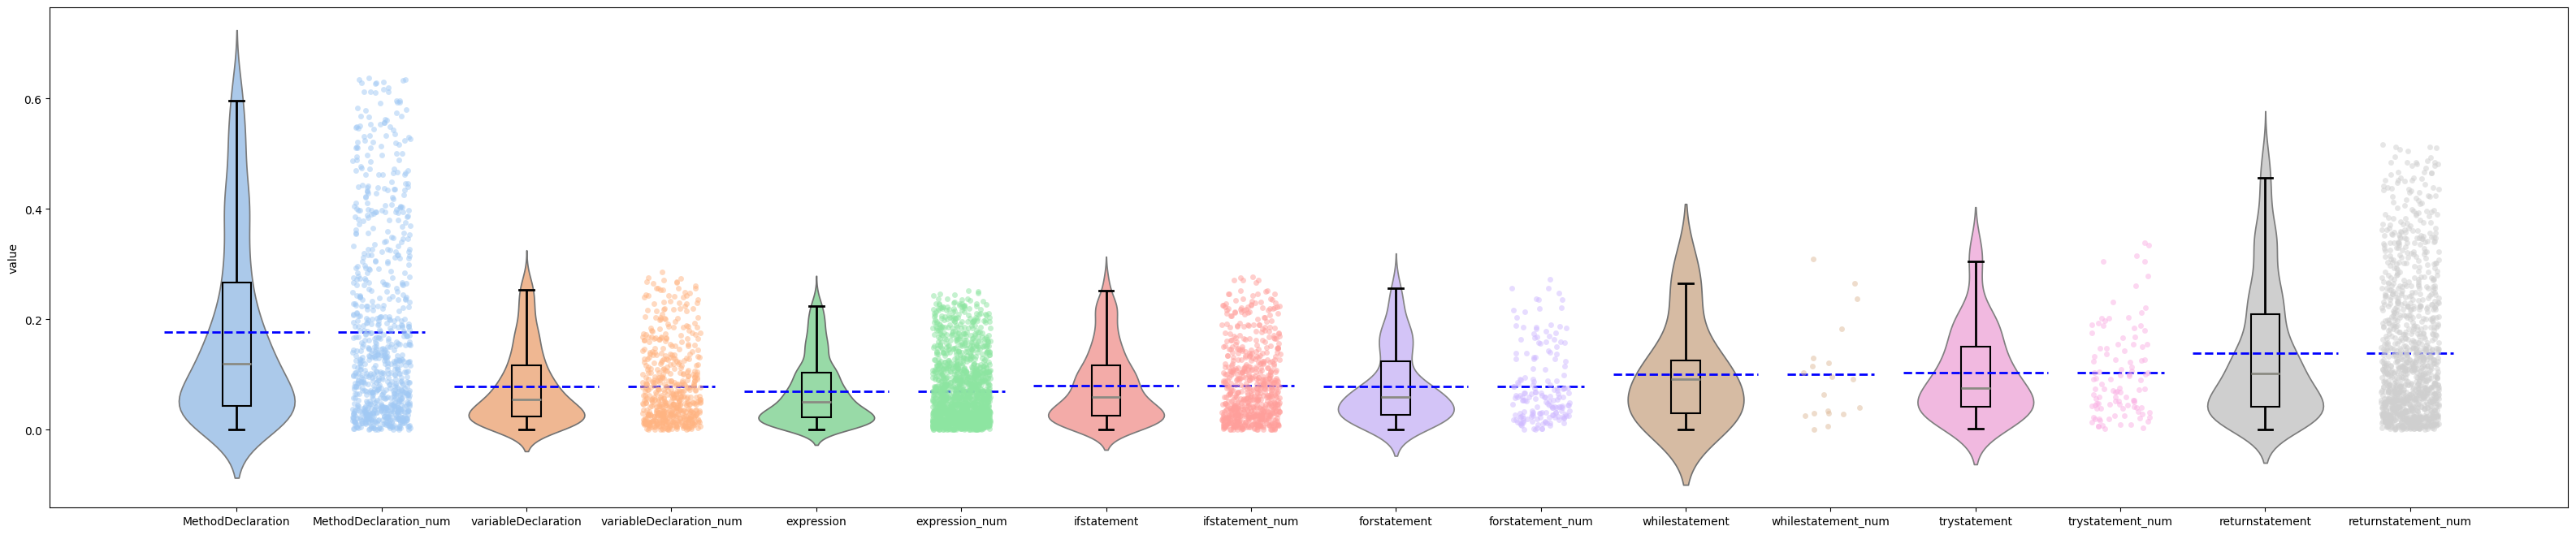

In [39]:
get_paper_picture(all_colunm_df_iqr_false_abs,save_path='D:/BERT_learing/CCDP/picture/iqr_false_Abs_line.png')